In [1]:
import numpy as np 

def filter(x):
    
    # set y to have the same length and type as x
    y = np.zeros_like(x)
    w_n = np.zeros(len(x))
    
    # iterate over all input samples
    for n, x_n in enumerate(x): #n is a counter 
        if(n>0):
            w_n[n] = (w_n[n-1] * 0.6) + x_n
        else: 
            w_n[0] = x_n
        
        
        y[n] = w_n[n-1]*0.2 + w_n[n]*0.2
    #compute 𝑦(𝑛) and store it in y[n]
    return y

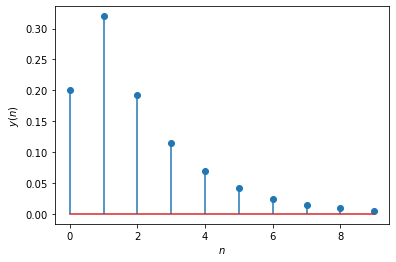

In [2]:
x = np.zeros(10)
x[0]=1 #generating unit impulse response 

y_n = filter(x) #Passing the unit impulse through filter 

#Plotting the result 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
n = np.arange(len(y_n))
ax.stem(n, y_n)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.show()

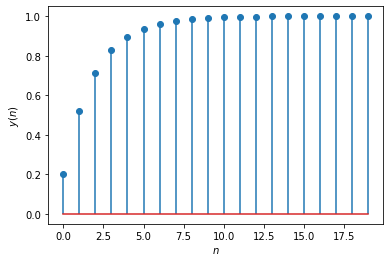

In [3]:
unitStep = np.ones(20) #Generating unit step 

y_n = filter(unitStep) #Passing through filter

#Outputting the result 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
n = np.arange(len(y_n))
ax.stem(n, y_n)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.show()


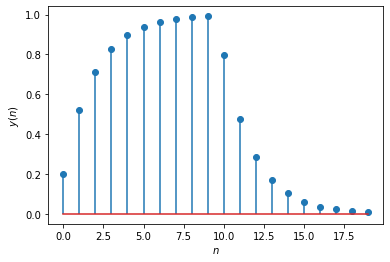

In [4]:
unitStep[10:]=0 #generating U(n) - U(n-10)

y_n = filter(unitStep)#passing it through filter 

#Outputting the result 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
n = np.arange(len(y_n))
ax.stem(n, y_n)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.show()


In [5]:
from scipy.io import wavfile
[fs, x] = wavfile.read('tones.wav') #reading first input sequence from audio file

y=filter(x) #Passing it through filter 

wavfile.write('output_tones.wav', fs,y) #Outputting to another audio file 

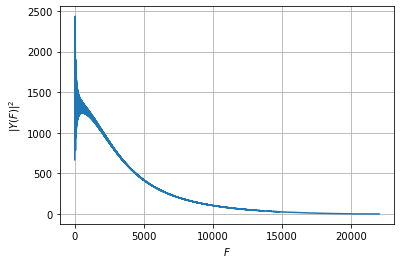

In [6]:
from scipy.fftpack import fft, fftfreq

X = fft(x) / len(x)
# spectrum is symmetric, so remove second half

X = X[:len(X) // 2]
Xp = np.abs(X) ** 2

# frequencies corresponding to the output of fft
F = fftfreq(len(x), 1 / fs)
F = F[:len(F) // 2]

#Plotting the power spectrum for input
fig, ax = plt.subplots()
ax.plot(F, Xp)
ax.set_xlabel('$F$')
ax.set_ylabel('$|X(F)|^2$')
ax.grid(True)

#Same thing as above, done for the output sequence Y
Y = fft(y) / len(y)

Y = Y[:len(Y) // 2]
Yp = np.abs(Y) ** 2

F1 = fftfreq(len(y), 1/fs)
F1 = F1[:len(F1) // 2]

fig, ax = plt.subplots()
ax.plot(F1,Yp)
ax.set_xlabel('$F$')
ax.set_ylabel('$|Y(F)|^2$')
ax.grid(True)

plt.show()


In [7]:
w_0 = 0.1
L = 100
n = np.arange(L)
x = np.cos(w_0 * n) #Defining a new sinusodial signal 

y = filter(x) #Passing it through filter

#Plotting 
fig, ax = plt.subplots()
ax.plot(n, x, label='$x(n)$')
ax.plot(n, y, label='$y(n)$')
ax.set_xlabel('$n$')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.show()

gain = np.max(y) #Outputting the gain 
print("Gain: " , gain)

Gain:  0.9803673673375857


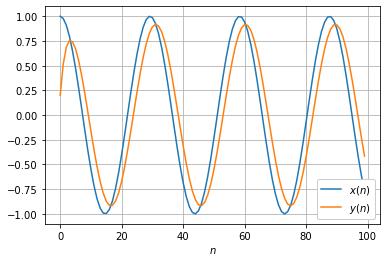

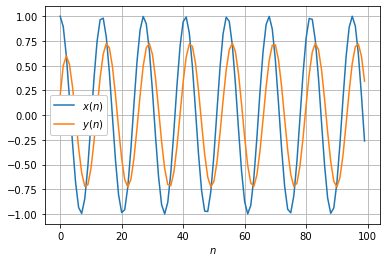

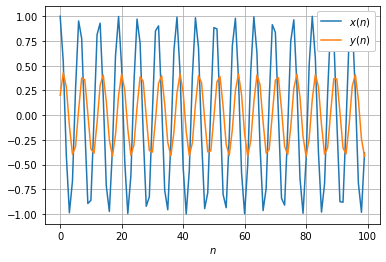

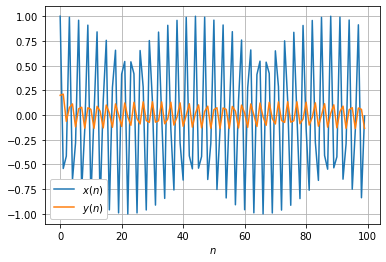

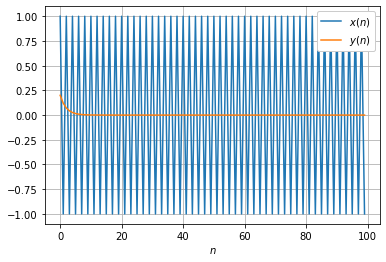

In [8]:
w0 = np.geomspace(0.1, np.pi, 10) #Making w0 logarithmically spaced 
GainList = []

def fun(w0,GainList): #Will do the same thing as in the previous cell 
    
    L = 100 
    n = np.arange(L)
    x = np.cos(w0 * n)
    
    y = filter(x)
    
    Gain = np.max(y)
    GainList.append(Gain)
    
    fig, ax = plt.subplots()
    #ax.set_xlim(45,60) #for zooming effect in the image 
    #ax.set_ylim(-0.25,0.25) #in order to take readings of delay 
    ax.plot(n, x, label='$x(n)$')
    ax.plot(n, y, label='$y(n)$')
    ax.set_xlabel('$n$')
    ax.legend(loc='best', framealpha=1)
    ax.grid(True)
    plt.show()
    
#Call the above defined function, for all the values of w0 
for i in range(len(w0)):
    fun(w0[i],GainList)

In [9]:
Delay = [0.2,0.294,0.43,0.632,0.695,1.02,0.996,0.73,1.07,0] #List of delays found by taking readings 

In [10]:
PowerGainin_dB = 20*np.log10(GainList) #Chaning gain into power gain in dB 

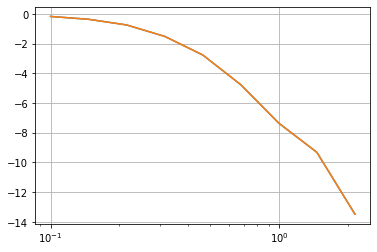

In [11]:
#Plotting magnitude response 
fig, ax = plt.subplots()
ax.plot(w0[0:9],PowerGainin_dB[0:9])#Note since magnitude in last image forms part of transient part, it is excluded 
ax.semilogx(w0[0:9],PowerGainin_dB[0:9])
ax.grid(True)

plt.show()

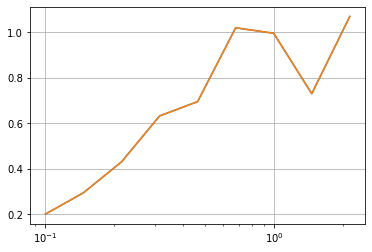

In [12]:
#Plotting phase response 
fig, ax = plt.subplots()
ax.plot(w0[0:9],Delay[0:9])
ax.semilogx(w0[0:9],Delay[0:9])
ax.grid(True)

plt.show()